### IMPORTING LIBRARIES AND  LOADING DATASET

In [55]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [56]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

### PERFORMING DATA PREPROCESSING

In [20]:
# normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [31]:
noise_factor = 0.1
noise_dataset = []
for img in X_train:
  noisy_image  = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)
noise_dataset = np.array(noise_dataset)

In [45]:
noise_test_dataset = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_dataset.append(noisy_image)
noise_test_dataset = np.array(noise_test_dataset)

In [46]:
noise_dataset.shape

(60000, 28, 28)

In [47]:
noise_test_dataset.shape

(10000, 28, 28)

### BUILDING AND TRAINING AUTOENCODER DEEP LEARNING MODEL

In [48]:
autoencoder = tf.keras.models.Sequential()
#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))


In [49]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-traina

In [50]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 9s 27ms/step - loss: 0.3847 - val_loss: 0.3092
Epoch 2/10
300/300 [==============================] - 7s 22ms/step - loss: 0.2986 - val_loss: 0.2951
Epoch 3/10
300/300 [==============================] - 6s 21ms/step - loss: 0.2891 - val_loss: 0.2884
Epoch 4/10
300/300 [==============================] - 6s 21ms/step - loss: 0.2847 - val_loss: 0.2855
Epoch 5/10
300/300 [==============================] - 7s 22ms/step - loss: 0.2822 - val_loss: 0.2831
Epoch 6/10
300/300 [==============================] - 7s 22ms/step - loss: 0.2800 - val_loss: 0.2813
Epoch 7/10
300/300 [==============================] - 7s 22ms/step - loss: 0.2784 - val_loss: 0.2799
Epoch 8/10
300/300 [==============================] - 6s 21ms/step - loss: 0.2774 - val_loss: 0.2791
Epoch 9/10
300/300 [==============================] - 7s 22ms/step - loss: 0.2767 - val_loss: 0.2785
Epoch 10/10
300/300 [==============================] - 7s 22ms/step - loss: 0.2761 - val_lo

# EVALUATING TRAINED MODEL PERFORMANCE

In [51]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 2ms/step - loss: 0.2780
Test Accuracy : 0.278


In [52]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 111ms/step


In [53]:
predicted.shape

(10, 28, 28, 1)

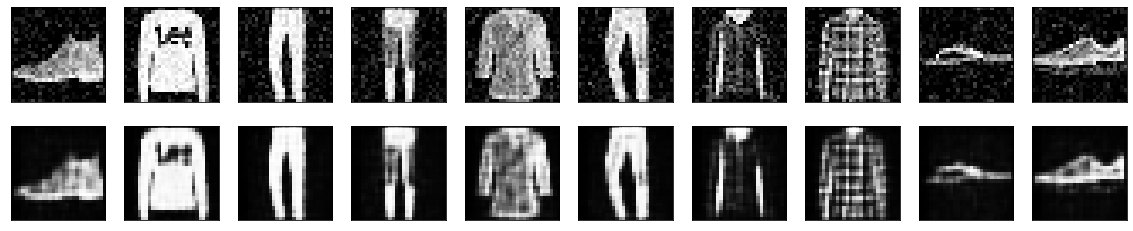

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)